# 2012-National-Election-DataViz
Author: Hanyu Zhao
Date:Dec 08, 2021

In [1]:
import pandas as pd
import bqplot
import numpy as np
import ipywidgets

In [2]:
elections = pd.read_csv('us-election-2012-results-by-county.csv')

In [3]:
elections_tb = pd.pivot_table(elections,
                                 index=["CountyNumber"],
                                 values=["CountyTotalVotes"],
                                 columns=["CountyName"],
                                  aggfunc=np.mean)

In [4]:
anames = elections_tb.columns.levels[1].to_list()
col_sc = bqplot.ColorScale(scheme="RdPu")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()


c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='CountyName')

y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'StateCode')

In [5]:
heat_map = bqplot.GridHeatMap(color = elections_tb.values,
                              row = elections_tb.index, 
                              column = anames,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'},
                              selected_style = {'opacity': 1.0},
unselected_style = {'opacity': 1.0})



In [6]:
#step 1
i,j = 0,0

#step2
x_sch = bqplot.DateScale()
y_sch = bqplot.LinearScale() 

#step3
ax_xcl = bqplot.Axis(label='CountyName', scale=x_sch)
ax_ycl = bqplot.Axis(label='CountyTotalVotes', scale=y_sch, 
                    orientation='vertical', side='left')

#step4
mask = (elections['StateCode'] == elections_tb.index[i]) & \
       (elections['CountyName'] == elections_tb.columns.levels[1][j])
elections_subset = elections[mask]
grouped = elections_subset.groupby("PrecintsReporting")["TotalPrecincts"].sum()
PR = grouped.index
tp = grouped.values

# plot
bar = bqplot.Bars(x = PR, y = tp,
                    scales = {'x': x_sch, 'y': y_sch})

fig_bar = bqplot.Figure(marks = [bar], axes = [ax_xcl, ax_ycl])

In [7]:
def get_data_value(change):
    i,j = change['owner'].selected[0]
    mask = (elections['StateCode'] == elections_tb.index[i]) & \
            (elections['CountyName'] == elections_tb.columns.levels[1][j])
    elections_subset = elections[mask]
    grouped = elections_subset.groupby("PrecintsReporting")["TotalPrecincts"].sum()
    years = grouped.index
    sqft = grouped.values
    bar.x = years
    bar.y = sqft
    
heat_map.observe(get_data_value, 'selected')

fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, x_ax, y_ax])

In [8]:
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax], 
                    fig_margin = dict(top=50, bottom=150, left=50, right=50))
fig.layout.align_items

fig.layout.min_width='700px'
fig.layout.min_height='600px'
fig_bar.layout.min_width='250px'

ipywidgets.HBox([fig,fig_bar])

For the data visualization above, I used 2012 election data, such as total votes from different states, the participated parties, the first name and the last name of the candidates, and the state codes, etc. Most of the data in the dataset is quanlitative data, so making dashboard using the data won't be super hard.

I was trying to make the dashboard linked with the histogram to let users see what information is lying under in each little square in the dashboard. By interating with the dashboard, the users could see the relationship between different data regarding the 2012 election situation.

While I was doing the interactivity, honestly speaking, I enteracted with some issue linking the data, letting the graphs appearing, and I even stuck while refreshing the notebook page. Moreover, through the data visualization, I would like to let users have a more clear vision of how many total votes each state had, and maybe we could use this trend combining with total votes in each state in recent election to see the participation of residents.

Below are the two contextual data visualizations I found from the website regarding the 2012 elections:
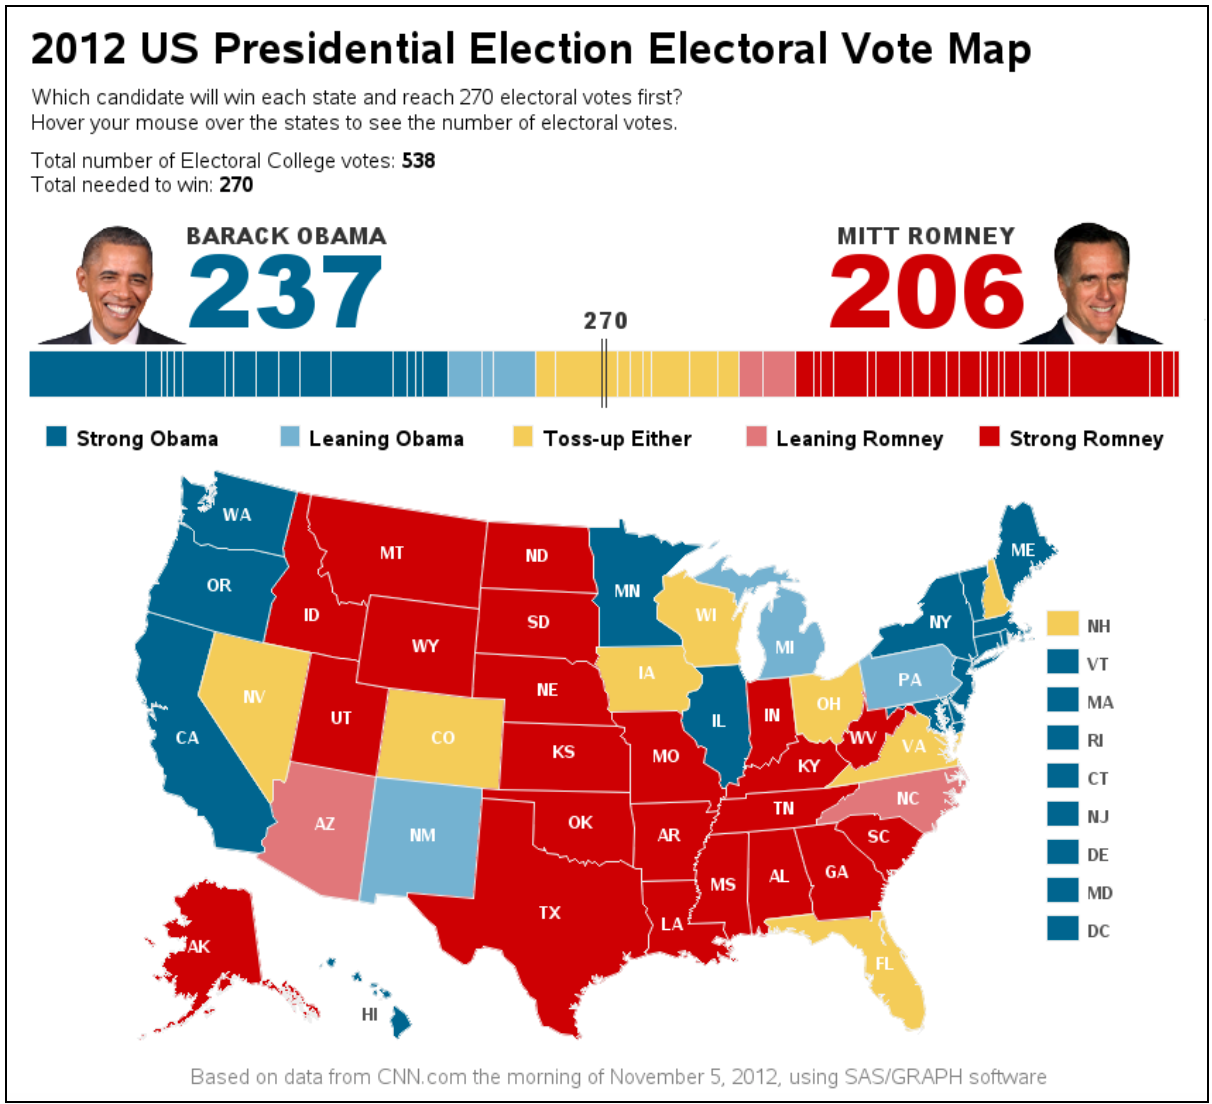

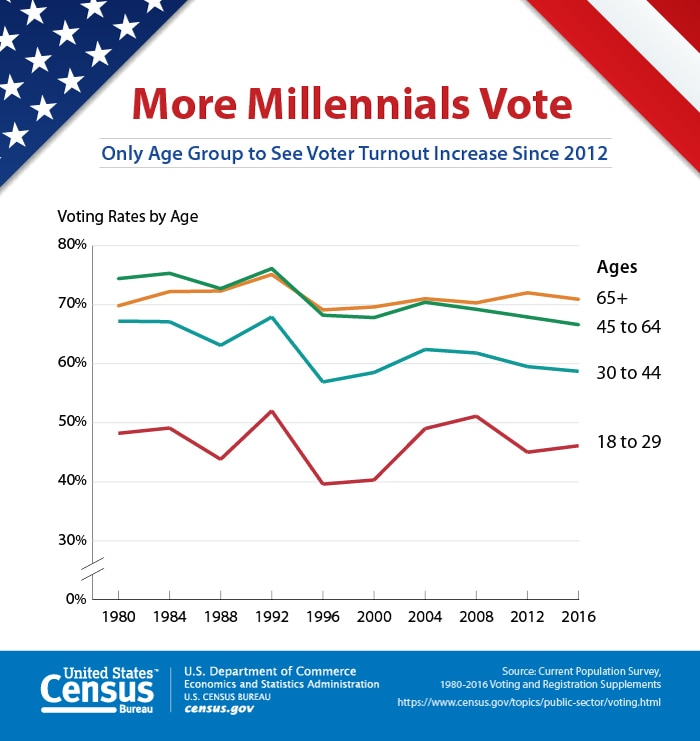

The two data visualization are: 2012 election vote map and participants age trend map. The first data visualization shows voting results of each state, and to better distinguish the party, colors are also marked in the map so that people could have a general veiw when seeing the visualization. The second data visualization shows the age change starting from 1980 to 2016. And through the image, we can easily see that starting from 2012, people whose age is between 18 to 29 are more willing to vote. I think these two data visualization could further help people understanding the 2012 election.

Sources Citation:

https://blogs.sas.com/content/sastraining/2012/11/05/sas-graphs-for-presidential-elections/
https://www.census.gov/library/visualizations/2017/comm/voting-rates-age.html
https://data.world/aaronhoffman/us-general-election-2012/workspace/file?filename=us-election-2012-results-by-county.csv